In [ ]:
!pip install plotly==5.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Colab için Plotly'ı yapılandırın
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Süper lig takımları hakkında bir analiz yapalım**

**Önce veri setimizi tanıyalım**

In [ ]:
dfapp = pd.read_csv('appearances.csv')
dfclubgames= pd.read_csv('club_games.csv')
dfclubs= pd.read_csv('clubs.csv')
dfcomp= pd.read_csv('competitions.csv')
dfgev= pd.read_csv('game_events.csv')
dfglin= pd.read_csv('game_lineups.csv')
dfgam= pd.read_csv('games.csv')
dfplval= pd.read_csv('player_valuations.csv')
dfpl= pd.read_csv('players.csv')
dftf= pd.read_csv('transfers.csv')

In [ ]:
dfapp.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978.0,38004.0,853.0,235.0,2012-07-03,Aurélien Joachim,CLQ,0.0,0.0,2.0,0.0,90.0
1,2233748_79232,2233748.0,79232.0,8841.0,2698.0,2012-07-05,Ruslan Abyshov,ELQ,0.0,0.0,0.0,0.0,90.0
2,2234413_42792,2234413.0,42792.0,6251.0,465.0,2012-07-05,Sander Puri,ELQ,0.0,0.0,0.0,0.0,45.0
3,2234418_73333,2234418.0,73333.0,1274.0,6646.0,2012-07-05,Vegar Hedenstad,ELQ,0.0,0.0,0.0,0.0,90.0
4,2234421_122011,2234421.0,122011.0,195.0,3008.0,2012-07-05,Markus Henriksen,ELQ,0.0,0.0,0.0,1.0,90.0


In [ ]:
dfgam.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


In [ ]:
dfgam[dfgam['season']==2023]

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
2462,4087962,GB1,2023,4. Matchday,2023-09-02,281,931,5,1,1.0,...,Etihad Stadium,52899.0,Michael Oliver,https://www.transfermarkt.co.uk/manchester-cit...,4-2-3-1,4-3-3 Attacking,Manchester City Football Club,Fulham Football Club,5:1,domestic_league
2463,4087965,GB1,2023,5. Matchday,2023-09-16,405,873,3,1,7.0,...,Villa Park,40809.0,Darren England,https://www.transfermarkt.co.uk/aston-villa_cr...,4-2-3-1,4-4-1-1,Aston Villa Football Club,Crystal Palace Football Club,3:1,domestic_league
2464,4089283,DK1,2023,1. Matchday,2023-07-23,678,443,1,0,4.0,...,Ceres Park,12215.0,Jonas Hansen,https://www.transfermarkt.co.uk/aarhus-gf_vejl...,3-4-2-1,3-4-3,Aarhus Gymnastik Forening,Vejle Boldklub,1:0,domestic_league
2465,4089551,DK1,2023,8. Matchday,2023-09-18,173,1177,0,3,9.0,...,Nature Energy Park,8481.0,Mads-Kristoffer Kristoffersen,https://www.transfermarkt.co.uk/odense-boldklu...,4-2-3-1,4-3-3 Attacking,Odense Boldklub,Silkeborg Idrætsforening,0:3,domestic_league
2466,4090252,DK1,2023,19. Matchday,2024-02-25,173,206,0,3,8.0,...,Nature Energy Park,14232.0,Sandi Putros,https://www.transfermarkt.co.uk/odense-boldklu...,3-4-2-1,3-4-2-1,Odense Boldklub,Brøndby Idrætsforening,0:3,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71617,4225940,NLP,2023,Second Round,2023-12-20,19964,467,1,6,NaN,...,Sportpark Panhuis,NaN,Jesse Rozendal,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-3-3 Defending,NaN,Nijmegen Eendracht Combinatie,1:6,domestic_cup
71622,4098179,NL1,2023,27. Matchday,2024-03-30,467,383,3,1,6.0,...,Goffertstadion,12500.0,Bas Nijhuis,https://www.transfermarkt.co.uk/nec-nijmegen_p...,4-3-3 Defending,4-3-3 Defending,Nijmegen Eendracht Combinatie,Eindhovense Voetbalvereniging Philips Sport Ve...,3:1,domestic_league
71632,4097959,NL1,2023,5. Matchday,2023-09-16,383,467,4,0,1.0,...,Philips Stadion,34200.0,Joey Kooij,https://www.transfermarkt.co.uk/psv-eindhoven_...,4-3-3 Attacking,4-3-3 Defending,Eindhovense Voetbalvereniging Philips Sport Ve...,Nijmegen Eendracht Combinatie,4:0,domestic_league
71665,4135635,CLQ,2023,3rd round 1st leg,2023-08-08,383,122,4,1,NaN,...,Philips Stadion,31500.0,Radu Petrescu,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-4-2 Diamond,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,4:1,international_cup


In [ ]:
dfcomp.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False


In [ ]:
dfcomp[dfcomp['name']=='super-lig']

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
29,TR1,super-lig,super-lig,first_tier,domestic_league,174,Turkey,TR1,europa,https://www.transfermarkt.co.uk/super-lig/star...,False


In [ ]:
dfstsl=dfgam[(dfgam['competition_id']=='TR1') & (dfgam['season']==2023)]

In [ ]:
dfstsl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 2916 to 71479
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 380 non-null    int64  
 1   competition_id          380 non-null    object 
 2   season                  380 non-null    int64  
 3   round                   380 non-null    object 
 4   date                    380 non-null    object 
 5   home_club_id            380 non-null    int64  
 6   away_club_id            380 non-null    int64  
 7   home_club_goals         380 non-null    int64  
 8   away_club_goals         380 non-null    int64  
 9   home_club_position      380 non-null    float64
 10  away_club_position      380 non-null    float64
 11  home_club_manager_name  379 non-null    object 
 12  away_club_manager_name  379 non-null    object 
 13  stadium                 380 non-null    object 
 14  attendance              379 non-null    fl

In [ ]:
dfstsl.sort_values(by='home_club_goals',ascending=False).iloc[:5]

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
3807,4129570,TR1,2023,16. Matchday,2024-01-10,36,2293,7,1,1.0,...,Ülker Stadyumu FB Şükrü Saraçoğlu Spor Kompleksi,29597.0,Kadir Sağlam,https://www.transfermarkt.co.uk/fenerbahce_kon...,4-2-3-1,4-2-3-1,Fenerbahçe Spor Kulübü,Konyaspor,7:1,domestic_league
15339,4129761,TR1,2023,35. Matchday,2024-05-05,141,2381,6,1,1.0,...,Ali Sami Yen Spor Kompleksi RAMS Park,48892.0,Arda Kardeşler,https://www.transfermarkt.co.uk/galatasaray_si...,4-2-3-1,5-4-1,Galatasaray Spor Kulübü,Sivasspor Kulübü,6:1,domestic_league
57329,4129702,TR1,2023,29. Matchday,2024-03-08,141,126,6,2,1.0,...,Ali Sami Yen Spor Kompleksi RAMS Park,42718.0,Bahattin Şimşek,https://www.transfermarkt.co.uk/galatasaray_ca...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Çaykur Rizespor Kulübü,6:2,domestic_league
67132,4129744,TR1,2023,34. Matchday,2024-04-28,11282,924,6,0,8.0,...,Alanya Oba Stadyumu,1541.0,Muhammet Ali Metoğlu,https://www.transfermarkt.co.uk/alanyaspor_ist...,4-2-3-1,3-4-3,Alanyaspor,Istanbulspor,6:0,domestic_league
57333,4129784,TR1,2023,38. Matchday,2024-05-26,36,924,6,0,2.0,...,Ülker Stadyumu FB Şükrü Saraçoğlu Spor Kompleksi,41241.0,Volkan Bayarslan,https://www.transfermarkt.co.uk/fenerbahce_ist...,4-4-2,5-4-1,Fenerbahçe Spor Kulübü,Istanbulspor,6:0,domestic_league


In [ ]:
dfstsl.sort_values(by='away_club_goals',ascending=False).iloc[:5]

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
7684,4129767,TR1,2023,36. Matchday,2024-05-12,3840,2832,1,6,11.0,...,Yeni Adana Stadyumu,6602.0,Abdulkadir Bitigen,https://www.transfermarkt.co.uk/adana-demirspo...,4-2-3-1,4-3-3 Attacking,Adana Demirspor Kulübü,Gaziantep Futbol Kulübü A.Ş.,1:6,domestic_league
7597,4129788,TR1,2023,38. Matchday,2024-05-26,3840,6890,2,6,12.0,...,Yeni Adana Stadyumu,3341.0,Burak Şeker,https://www.transfermarkt.co.uk/adana-demirspo...,3-4-3,4-3-3 Attacking,Adana Demirspor Kulübü,İstanbul Başakşehir Futbol Kulübü,2:6,domestic_league
63179,4126823,TR1,2023,4. Matchday,2023-09-01,10484,449,1,5,11.0,...,Recep Tayyip Erdoğan Stadyumu,3605.0,Erkan Özdamar,https://www.transfermarkt.co.uk/kasimpasa_trab...,4-2-3-1,4-2-3-1,Kasımpaşa Spor Kulübü,Trabzonspor Kulübü,1:5,domestic_league
33269,4126775,TR1,2023,1. Matchday,2023-08-12,3209,7775,1,5,18.0,...,Ümraniye Belediyesi Şehir Stadı,1269.0,Çağdaş Altay,https://www.transfermarkt.co.uk/pendikspor_hat...,4-4-2 double 6,4-3-3 Attacking,Pendikspor,Hatayspor Futbol Kulübü,1:5,domestic_league
68673,4129504,TR1,2023,10. Matchday,2023-10-29,3209,36,0,5,18.0,...,Pendik Stadı,1343.0,Abdulkadir Bitigen,https://www.transfermarkt.co.uk/pendikspor_fen...,4-2-3-1,4-2-3-1,Pendikspor,Fenerbahçe Spor Kulübü,0:5,domestic_league


In [ ]:
dfstsl['total_goals'] = dfstsl['home_club_goals'] + dfstsl['away_club_goals']

<ipython-input-87-928dc7fa7723>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstsl['total_goals'] = dfstsl['home_club_goals'] + dfstsl['away_club_goals']


In [ ]:
dfstsl.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,total_goals
2916,4129493,TR1,2023,9. Matchday,2023-10-21,3205,126,3,1,9.0,...,4049.0,Burak Şeker,https://www.transfermarkt.co.uk/kayserispor_ca...,4-2-3-1,4-2-3-1,Kayserispor Kulübü,Çaykur Rizespor Kulübü,3:1,domestic_league,4
2917,4129517,TR1,2023,11. Matchday,2023-11-06,2832,126,2,0,13.0,...,6570.0,Ali Şansalan,https://www.transfermarkt.co.uk/gaziantep-fk_c...,3-5-2 Attacking,4-2-3-1,Gaziantep Futbol Kulübü A.Ş.,Çaykur Rizespor Kulübü,2:0,domestic_league,2
2918,4129528,TR1,2023,12. Matchday,2023-11-11,6646,2381,3,0,12.0,...,513.0,Murat Erdoğan,https://www.transfermarkt.co.uk/fatih-karagumr...,4-3-3 Attacking,4-3-3 Attacking,Fatih Karagümrük,Sivasspor Kulübü,3:0,domestic_league,3
2919,4129590,TR1,2023,18. Matchday,2023-12-23,449,6890,1,1,3.0,...,12431.0,Volkan Bayarslan,https://www.transfermarkt.co.uk/trabzonspor_ba...,4-3-3 Attacking,4-3-3 Attacking,Trabzonspor Kulübü,İstanbul Başakşehir Futbol Kulübü,1:1,domestic_league,2
2920,4129668,TR1,2023,26. Matchday,2024-02-16,10484,6646,1,1,5.0,...,2423.0,Kadir Sağlam,https://www.transfermarkt.co.uk/kasimpasa_fati...,4-3-3 Attacking,4-2-3-1,Kasımpaşa Spor Kulübü,Fatih Karagümrük,1:1,domestic_league,2


In [ ]:
dfstsl.sort_values(by='total_goals',ascending=False).iloc[:5]

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,total_goals
3807,4129570,TR1,2023,16. Matchday,2024-01-10,36,2293,7,1,1.0,...,29597.0,Kadir Sağlam,https://www.transfermarkt.co.uk/fenerbahce_kon...,4-2-3-1,4-2-3-1,Fenerbahçe Spor Kulübü,Konyaspor,7:1,domestic_league,8
7597,4129788,TR1,2023,38. Matchday,2024-05-26,3840,6890,2,6,12.0,...,3341.0,Burak Şeker,https://www.transfermarkt.co.uk/adana-demirspo...,3-4-3,4-3-3 Attacking,Adana Demirspor Kulübü,İstanbul Başakşehir Futbol Kulübü,2:6,domestic_league,8
57329,4129702,TR1,2023,29. Matchday,2024-03-08,141,126,6,2,1.0,...,42718.0,Bahattin Şimşek,https://www.transfermarkt.co.uk/galatasaray_ca...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Çaykur Rizespor Kulübü,6:2,domestic_league,8
15339,4129761,TR1,2023,35. Matchday,2024-05-05,141,2381,6,1,1.0,...,48892.0,Arda Kardeşler,https://www.transfermarkt.co.uk/galatasaray_si...,4-2-3-1,5-4-1,Galatasaray Spor Kulübü,Sivasspor Kulübü,6:1,domestic_league,7
63222,4129573,TR1,2023,17. Matchday,2023-12-20,3205,36,3,4,6.0,...,13049.0,Zorbay Küçük,https://www.transfermarkt.co.uk/kayserispor_fe...,4-2-3-1,4-2-3-1,Kayserispor Kulübü,Fenerbahçe Spor Kulübü,3:4,domestic_league,7


In [ ]:
dfstsl.isnull().sum()

,0
game_id,0
competition_id,0
season,0
round,0
date,0
home_club_id,0
away_club_id,0
home_club_goals,0
away_club_goals,0
home_club_position,0


# **FORMANSYONLARIN ATILAN VE YENİLEN GOLLERE ETKİLERİNİ İNCELEYELİM**

In [ ]:
dfstsl['home_club_formation'].value_counts()

,count
home_club_formation,
4-2-3-1,218
4-3-3 Attacking,109
4-4-2 double 6,15
3-4-3,14
4-1-4-1,9
3-5-2 Attacking,3
3-5-2,3
3-5-2 flat,2
3-1-4-2,2


In [ ]:
dfstsl['away_club_formation'].value_counts()

,count
away_club_formation,
4-2-3-1,215
4-3-3 Attacking,110
3-4-3,17
4-4-2 double 6,13
4-1-4-1,7
3-5-2 Attacking,5
3-5-2,5
3-4-2-1,3
5-4-1,2


<Axes: xlabel='count', ylabel='away_club_formation'>

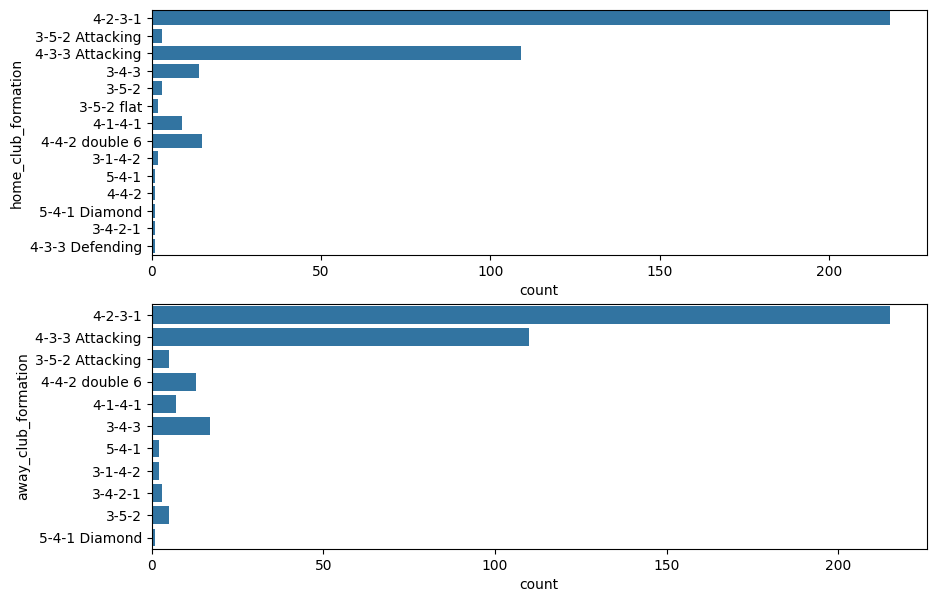

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.countplot(dfstsl['home_club_formation'])

plt.subplot(2,1,2)
sns.countplot(dfstsl['away_club_formation'])

**takımlarımız genel olarak 4-2-3-1 ve 4-3-3 attacking dizilişlerini tercih etmiş.**

In [ ]:
dfstsl.groupby('home_club_formation')['home_club_goals'].mean().sort_values(ascending=False)

,home_club_goals
home_club_formation,
4-4-2,6.000000
4-2-3-1,1.752294
4-1-4-1,1.444444
4-3-3 Attacking,1.422018
3-5-2 Attacking,1.333333
4-4-2 double 6,1.200000
3-4-2-1,1.000000
3-4-3,1.000000
3-5-2 flat,1.000000


In [ ]:
dfstsl.groupby('home_club_formation')['away_club_goals'].mean().sort_values(ascending=False)

,away_club_goals
home_club_formation,
5-4-1,3.000000
3-1-4-2,2.000000
3-4-3,1.785714
3-5-2,1.666667
3-5-2 flat,1.500000
4-4-2 double 6,1.400000
4-1-4-1,1.333333
4-3-3 Attacking,1.211009
4-2-3-1,1.160550


**"4-2-3-1" ve "4-3-3 attacking" formasyonları açık ara en çok kullanılan formasyonlar olduğu için onları karşılaştıralım.**

**iç sahada oynayan takımlar "4-2-3-1" ile oynarken "4-3-3 attacking" formasyonuna göre ortalama daha çok gol atıp daha az gol yemişler yani 4-2-3-1 formasyonu daha başarılı olmuş diyebiliriz.**



In [ ]:
dfstsl.groupby('away_club_formation')['home_club_goals'].mean().sort_values(ascending=False)

,home_club_goals
away_club_formation,
5-4-1,6.000000
5-4-1 Diamond,3.000000
4-1-4-1,2.000000
3-4-3,1.764706
3-4-2-1,1.666667
4-2-3-1,1.567442
3-1-4-2,1.500000
4-3-3 Attacking,1.490909
3-5-2 Attacking,1.400000


In [ ]:
dfstsl.groupby('away_club_formation')['away_club_goals'].mean().sort_values(ascending=False)

,away_club_goals
away_club_formation,
3-5-2,1.800000
4-2-3-1,1.297674
4-3-3 Attacking,1.172727
3-1-4-2,1.000000
3-4-2-1,1.000000
3-5-2 Attacking,1.000000
4-4-2 double 6,1.000000
5-4-1 Diamond,1.000000
3-4-3,0.882353


**deplasmanda ise 4-3-3 attacking formasyonuyla hem daha az gol atıp hem de daha az gol yemişler**

# **Takımların Maçlara Katılan Taraftar Sayısını İnceleyelim**

In [ ]:
dfstsl['attendance'].describe()

,attendance
count,379.000000
mean,11156.472296
std,12673.867475
min,23.000000
25%,2167.500000
50%,6311.000000
75%,13920.000000
max,53775.000000


In [ ]:
dfstsl['attendance'].sort_values(ascending=False)

,attendance
37659,53775.0
8563,50429.0
15339,48892.0
57331,48689.0
57313,45891.0
...,...
29167,159.0
71165,151.0
68566,51.0
42712,23.0


In [ ]:
dfstsl.sort_values(by='attendance',ascending=False).iloc[:10]

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,total_goals
37659,4129780,TR1,2023,37. Matchday,2024-05-19,141,36,0,1,1.0,...,53775.0,Arda Kardeşler,https://www.transfermarkt.co.uk/galatasaray_fe...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Fenerbahçe Spor Kulübü,0:1,domestic_league,1
8563,4129495,TR1,2023,9. Matchday,2023-10-21,141,114,2,1,2.0,...,50429.0,Halil Umut Meler,https://www.transfermarkt.co.uk/galatasaray_be...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Beşiktaş Jimnastik Kulübü,2:1,domestic_league,3
15339,4129761,TR1,2023,35. Matchday,2024-05-05,141,2381,6,1,1.0,...,48892.0,Arda Kardeşler,https://www.transfermarkt.co.uk/galatasaray_si...,4-2-3-1,5-4-1,Galatasaray Spor Kulübü,Sivasspor Kulübü,6:1,domestic_league,7
57331,4129734,TR1,2023,33. Matchday,2024-04-21,141,3209,4,1,1.0,...,48689.0,Direnç Tonusluoğlu,https://www.transfermarkt.co.uk/galatasaray_pe...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Pendikspor,4:1,domestic_league,5
57313,4126786,TR1,2023,2. Matchday,2023-08-19,141,449,2,0,5.0,...,45891.0,Atilla Karaoğlan,https://www.transfermarkt.co.uk/galatasaray_tr...,4-2-3-1,4-1-4-1,Galatasaray Spor Kulübü,Trabzonspor Kulübü,2:0,domestic_league,2
23208,4129658,TR1,2023,25. Matchday,2024-02-10,141,6890,2,0,1.0,...,45504.0,Cihan Aydın,https://www.transfermarkt.co.uk/galatasaray_ba...,4-2-3-1,4-3-3 Attacking,Galatasaray Spor Kulübü,İstanbul Başakşehir Futbol Kulübü,2:0,domestic_league,2
15335,4129583,TR1,2023,18. Matchday,2023-12-24,36,141,0,0,1.0,...,45401.0,Arda Kardeşler,https://www.transfermarkt.co.uk/fenerbahce_gal...,4-3-3 Attacking,4-2-3-1,Fenerbahçe Spor Kulübü,Galatasaray Spor Kulübü,0:0,domestic_league,0
63221,4129555,TR1,2023,15. Matchday,2023-12-08,141,3840,3,1,2.0,...,45183.0,Abdulkadir Bitigen,https://www.transfermarkt.co.uk/galatasaray_ad...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Adana Demirspor Kulübü,3:1,domestic_league,4
41643,4129520,TR1,2023,11. Matchday,2023-11-04,36,449,2,3,2.0,...,44821.0,Zorbay Küçük,https://www.transfermarkt.co.uk/fenerbahce_tra...,4-2-3-1,4-2-3-1,Fenerbahçe Spor Kulübü,Trabzonspor Kulübü,2:3,domestic_league,5
15442,4129515,TR1,2023,11. Matchday,2023-11-03,141,10484,2,1,1.0,...,44158.0,Arda Kardeşler,https://www.transfermarkt.co.uk/galatasaray_ka...,4-2-3-1,4-2-3-1,Galatasaray Spor Kulübü,Kasımpaşa Spor Kulübü,2:1,domestic_league,3


In [ ]:
dfsorted=dfstsl.sort_values(by='attendance',ascending=False)

Text(0, 0.5, 'Takımlar')

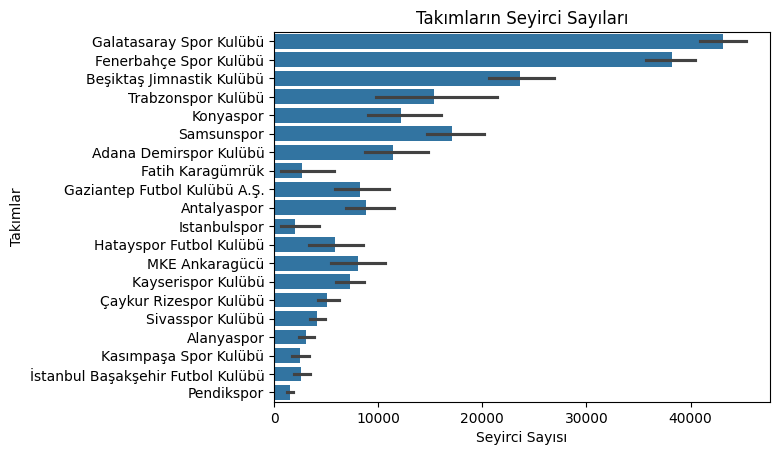

In [ ]:
plt.title('Takımların Seyirci Sayıları')
sns.barplot(x=dfsorted['attendance'],y=dfsorted['home_club_name'])
plt.xlabel('Seyirci Sayısı')
plt.ylabel('Takımlar')

Stada gelen seyirci sayılarına baktığımızda Galatasarayın seyirci sayısının en fazlayken Pendiksporun en düşük olduğunu görmekteyiz.

# **Takımların Milli Oyuncu sayılarını inceleyelim**

In [ ]:
dfclubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  439 non-null    int64  
 1   club_code                439 non-null    object 
 2   name                     439 non-null    object 
 3   domestic_competition_id  439 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               439 non-null    int64  
 6   average_age              401 non-null    float64
 7   foreigners_number        439 non-null    int64  
 8   foreigners_percentage    390 non-null    float64
 9   national_team_players    439 non-null    int64  
 10  stadium_name             439 non-null    object 
 11  stadium_seats            439 non-null    int64  
 12  net_transfer_record      439 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [ ]:
dfclubs.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,26.3,16,51.6,7,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.3,19,73.1,18,Olimpico di Roma,70634,€-65.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,27,25.4,18,66.7,17,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [ ]:
dfclubs.isnull().sum()

,0
club_id,0
club_code,0
name,0
domestic_competition_id,0
total_market_value,439
squad_size,0
average_age,38
foreigners_number,0
foreigners_percentage,49
national_team_players,0


In [ ]:
dfstsl24=dfclubs[(dfclubs['domestic_competition_id']=='TR1') & (dfclubs['last_season']==2024)]

In [ ]:
fig = px.scatter(dfstsl24,
                 x='national_team_players',
                 y='squad_size',
                 title='Takımların Milli Oyuncu sayıları',
                 labels={'national_team_players': 'Milli Oyuncu sayısı', 'squad_size': 'Kadro Büyüklüğü'},
                 color='club_code',
                 size='national_team_players',
                 text='national_team_players',)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# **Takımların Ortalama Yaşlarını İnceleyelim**

In [ ]:
dfavgage=dfstsl24.sort_values(by='average_age',ascending=False)

In [ ]:
fig = px.bar(dfavgage,
             x = 'average_age',
             y = 'name',
             title = 'Takımların Ortalama Yaşları',
             labels = {'average_age': 'Ortalama Yaş', 'club name': 'Takım Adı'},
             color = 'average_age',)
fig.show()
